In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df= pd.read_csv(r"C:\Users\bishw\OneDrive\Desktop\Datasets\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
gd=df

In [36]:
df.shape

(1338, 7)

In [37]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

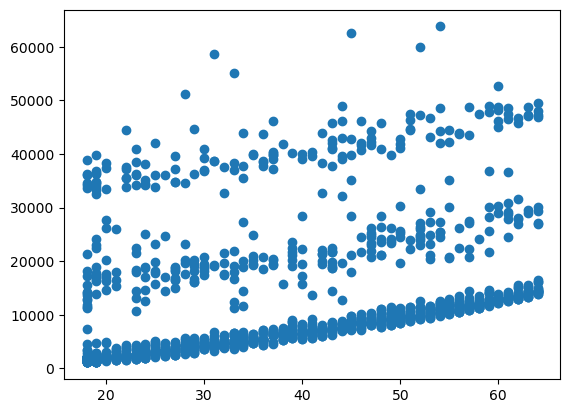

In [39]:
plt.scatter(df['age'],df['charges'])


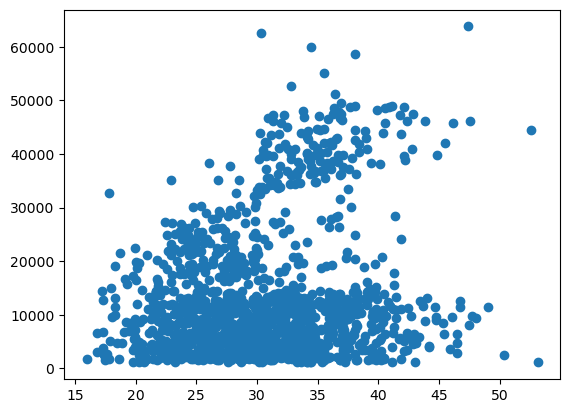

In [40]:
plt.scatter(df['bmi'],df['charges'])

In [41]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

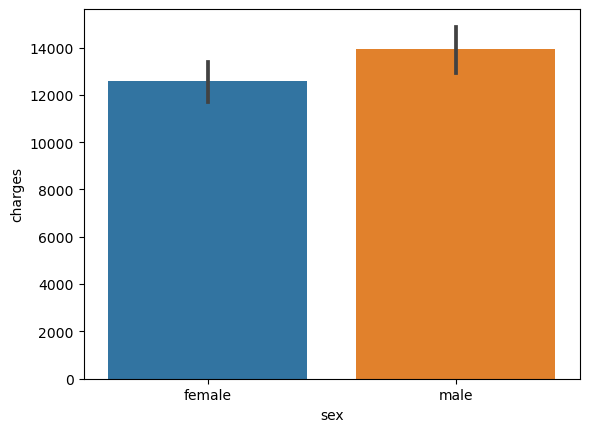

In [42]:
sns.barplot(x='sex',y='charges',data=df)

<Axes: xlabel='smoker', ylabel='charges'>

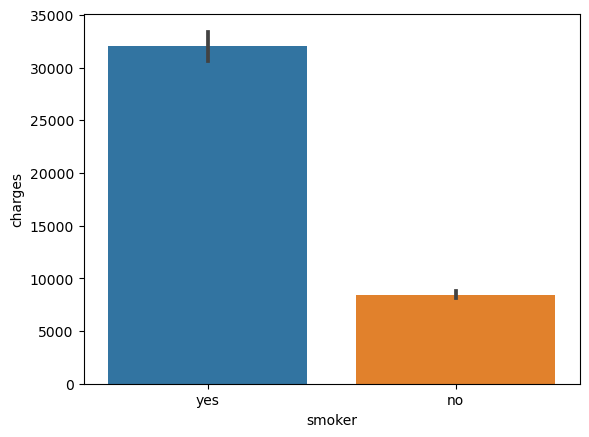

In [43]:
sns.barplot(x='smoker',y='charges',data=df)


<Axes: xlabel='region', ylabel='charges'>

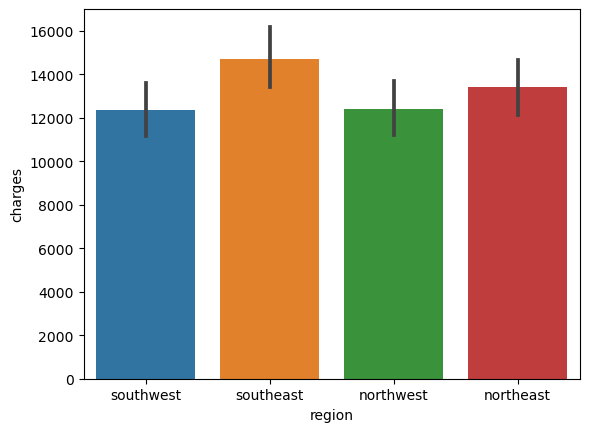

In [44]:
sns.barplot(x='region',y='charges',data=df)

<Axes: xlabel='children', ylabel='charges'>

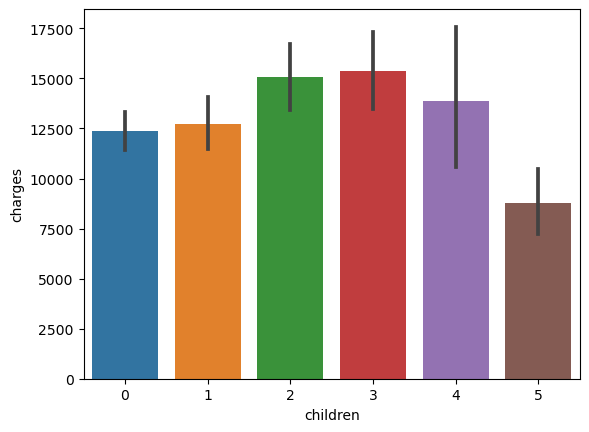

In [45]:
sns.barplot(x='children',y='charges',data=df)

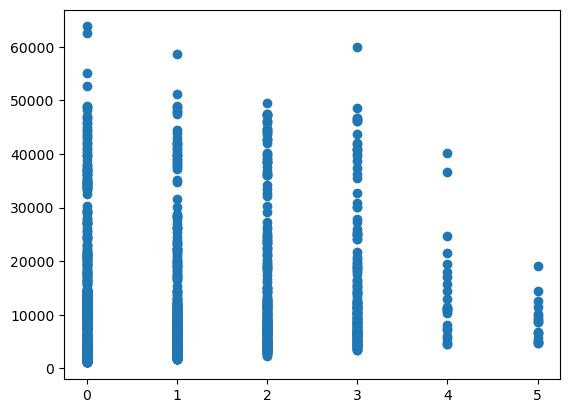

In [46]:
plt.scatter(df['children'],df['charges'])

In [47]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe=OneHotEncoder()

In [50]:
df1=ohe.fit_transform(df[['sex','smoker','region']]).toarray()

In [51]:
df=np.hstack((df1,df[['age','bmi','children','charges']].values))

In [52]:
df[-1]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.10000000e+01, 2.90700000e+01, 0.00000000e+00, 2.91413603e+04])

In [53]:
X=df[:,0:5]

In [54]:
y=df[:,-1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
y_pred

array([ 8692.61392253,  8419.69920768,  8692.61392253,  8654.65279729,
        8692.61392253,  8381.73808244,  8654.65279729,  8419.69920768,
        8381.73808244,  8381.73808244,  8381.73808244,  8381.73808244,
       32055.40863877,  8654.65279729,  8419.69920768,  8654.65279729,
        8692.61392253,  8381.73808244, 32328.32335363,  8419.69920768,
        8381.73808244,  8381.73808244, 32328.32335363, 32093.36976401,
       32328.32335363,  8654.65279729,  8419.69920768,  8654.65279729,
        8381.73808244,  8381.73808244,  8381.73808244,  8381.73808244,
        8381.73808244,  8654.65279729,  8654.65279729,  8381.73808244,
       32055.40863877,  8654.65279729, 32366.28447886,  8654.65279729,
        8381.73808244, 32328.32335363,  8381.73808244,  8381.73808244,
        8381.73808244,  8381.73808244,  8654.65279729,  8654.65279729,
        8654.65279729,  8654.65279729,  8692.61392253,  8654.65279729,
       32055.40863877, 32328.32335363,  8381.73808244,  8381.73808244,
      

In [62]:
r2_score(y_test,y_pred)

0.5860269409730376

## By Gradient Descent

In [70]:
gd

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
gd.shape

(1338, 7)

In [71]:
df2=gd

In [72]:
from sklearn.linear_model import SGDRegressor

In [81]:
bgd_regressor = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', penalty=None, shuffle=True)

In [82]:

bgd_regressor.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', penalty=None)

In [83]:
y_pred1=lr.predict(X_test)

In [84]:
r2_score(y_test,y_pred1)

0.5860269409730376

In [79]:
len(X_train)

1070